In [65]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib as mlp
import matplotlib.pyplot as plt

In [49]:
covid_api = "https://api.covid19api.com/"
covid_api_path = "country/austria/status/confirmed?from=2020-01-01T00:00:00Z&to=2021-01-01T00:00:00Z"

response = requests.get(covid_api + covid_api_path)
covid_data = response.text

In [50]:
covid_df = pd.read_json(covid_data)
covid_df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Austria,AT,,,,47.52,14.55,0,confirmed,2020-01-22 00:00:00+00:00
1,Austria,AT,,,,47.52,14.55,0,confirmed,2020-01-23 00:00:00+00:00
2,Austria,AT,,,,47.52,14.55,0,confirmed,2020-01-24 00:00:00+00:00
3,Austria,AT,,,,47.52,14.55,0,confirmed,2020-01-25 00:00:00+00:00
4,Austria,AT,,,,47.52,14.55,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
341,Austria,AT,,,,47.52,14.55,349266,confirmed,2020-12-28 00:00:00+00:00
342,Austria,AT,,,,47.52,14.55,350963,confirmed,2020-12-29 00:00:00+00:00
343,Austria,AT,,,,47.52,14.55,353088,confirmed,2020-12-30 00:00:00+00:00
344,Austria,AT,,,,47.52,14.55,356063,confirmed,2020-12-31 00:00:00+00:00


Text(0, 0.5, 'Cases')

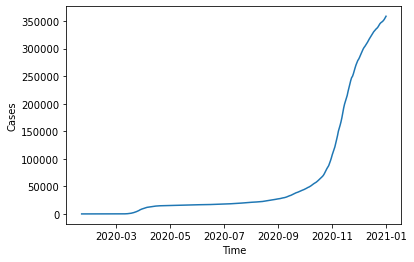

In [57]:
# covid_df["Date"] = covid_df["Date"].apply(lambda d: pd.to_datetime(str(d)))
plt.plot(covid_df["Date"], covid_df['Cases'])
plt.xlabel('Time')
plt.ylabel('Cases')

In [52]:
co_api = "https://api.v2.emissions-api.org/api/v2/carbonmonoxide/average.json?country=AT&begin=2020-01-01&end=2021-01-01"
co_api_key = ""
response = requests.get(co_api + co_api_key)
co_data = response.text

In [41]:
co_df = pd.read_json(co_data) # mol/m^2
co_df

,average,end,start
0,0.029588,2019-02-10T12:06:08.211000Z,2019-02-10T12:05:35.812000Z
1,0.029455,2019-02-11T11:47:21.813000Z,2019-02-11T11:46:51.573000Z
2,0.032591,2019-02-12T13:09:29.075000Z,2019-02-12T11:28:03.014000Z
3,0.033029,2019-02-13T12:50:34.994000Z,2019-02-13T11:09:25.973000Z
4,0.031111,2019-02-14T12:31:30.353000Z,2019-02-14T10:51:03.451000Z
...,...,...,...
1037,0.031876,2022-02-05T13:50:45.241000Z,2022-02-05T12:09:37.896000Z
1038,0.032495,2022-02-06T13:31:44.857000Z,2022-02-06T11:51:16.991000Z
1039,0.029580,2022-02-07T11:33:07.245000Z,2022-02-07T11:32:44.565000Z
1040,0.027586,2022-02-09T14:15:45.645000Z,2022-02-09T14:15:38.925000Z


Text(0, 0.5, 'CO emission')

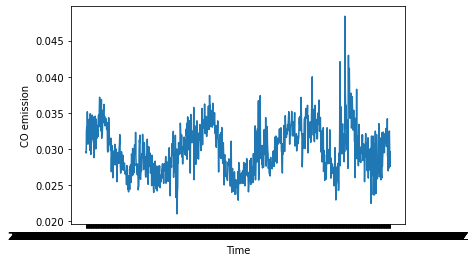

In [56]:
plt.plot(co_df['start'], co_df['average'])
plt.xlabel('Time')
plt.ylabel('CO emission')

ValueError: x and y must have same first dimension, but have shapes (346,) and (1042,)

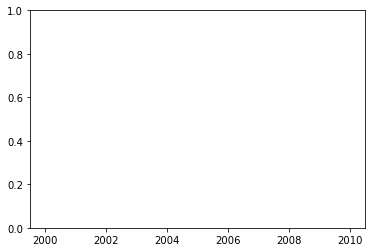

In [75]:
plt.plot(covid_df["Date"], co_df['average'], label="co")
plt.plot(covid_df["Date"], covid_df['Cases'], label="covid")
plt.xlabel('Time')

In [ ]:
# spark = SparkSession.builder.getOrCreate()
# sc = spark.sparkContext
# rddjson = sc.parallelize(jsonStr)
# covid_df2 = spark.read.json(rddjson)
# covid_df2

Py4JJavaError: An error occurred while calling o33.json.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 8 in stage 0.0 failed 1 times, most recent failure: Lost task 8.0 in stage 0.0 (TID 8) (host.docker.internal executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:189)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:164)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.sql.execution.SQLExecutionRDD.$anonfun$compute$1(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:158)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:705)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:749)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:673)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:639)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:615)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:572)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:530)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:176)
	... 31 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2323)
	at org.apache.spark.sql.catalyst.json.JsonInferSchema.infer(JsonInferSchema.scala:116)
	at org.apache.spark.sql.execution.datasources.json.TextInputJsonDataSource$.$anonfun$inferFromDataset$5(JsonDataSource.scala:110)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.datasources.json.TextInputJsonDataSource$.inferFromDataset(JsonDataSource.scala:110)
	at org.apache.spark.sql.DataFrameReader.$anonfun$json$6(DataFrameReader.scala:415)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.json(DataFrameReader.scala:415)
	at org.apache.spark.sql.DataFrameReader.json(DataFrameReader.scala:390)
	at org.apache.spark.sql.DataFrameReader.json(DataFrameReader.scala:376)
	at java.base/jdk.internal.reflect.DirectMethodHandleAccessor.invoke(DirectMethodHandleAccessor.java:104)
	at java.base/java.lang.reflect.Method.invoke(Method.java:577)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:189)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:164)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.sql.execution.SQLExecutionRDD.$anonfun$compute$1(SQLExecutionRDD.scala:52)
	at org.apache.spark.sql.internal.SQLConf$.withExistingConf(SQLConf.scala:158)
	at org.apache.spark.sql.execution.SQLExecutionRDD.compute(SQLExecutionRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:705)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:749)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:673)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:639)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:615)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:572)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:530)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:176)
	... 31 more
